### 1. Read and Clean the Dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('portland.csv')

In [2]:
df.sample(10)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
95,MLS Listing,NaN,Single Family Residential,5401 NE 35th Pl,Portland,OR,97211,495000,3.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/5401-NE-35th...,RMLS,20244859,N,Y,45.562030,-122.627888
88,MLS Listing,NaN,Single Family Residential,2512 SE 52nd Ave,Portland,OR,97206,475000,2.0,1.0,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/2512-SE-52nd...,RMLS,20481223,N,Y,45.504667,-122.608743
165,MLS Listing,NaN,Single Family Residential,2405 SE 115th Ave,Portland,OR,97216,399900,3.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/2405-SE-115t...,RMLS,20446858,N,Y,45.505058,-122.545057
67,MLS Listing,NaN,Condo/Co-op,17564 NW Springville Rd Unit H3,Portland,OR,97229,188000,1.0,1.0,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/17564-NW-Spr...,RMLS,20316272,N,Y,45.560706,-122.857621
329,MLS Listing,NaN,Single Family Residential,5240 SW Westwood Vw,Portland,OR,97239,1625000,5.0,3.5,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/5240-SW-West...,RMLS,20424578,N,Y,45.485036,-122.689645
38,MLS Listing,NaN,Single Family Residential,3467 SW Doschview Ct,Portland,OR,97239,725000,4.0,3.0,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/3467-SW-Dosc...,RMLS,20547673,N,Y,45.498052,-122.712637
136,MLS Listing,NaN,Single Family Residential,240 NE 141st Ave,Portland,OR,97230,549000,4.0,2.0,...,Active,July-25-2020 11:00 AM,July-25-2020 02:00 PM,http://www.redfin.com/OR/Portland/240-NE-141st...,RMLS,20307112,N,Y,45.524692,-122.517985
31,MLS Listing,NaN,Single Family Residential,1817 NE 38th Ave,Portland,OR,97212,899000,5.0,4.0,...,Active,July-25-2020 02:00 PM,July-25-2020 04:00 PM,http://www.redfin.com/OR/Portland/1817-NE-38th...,RMLS,20648928,N,Y,45.536090,-122.624258
71,MLS Listing,NaN,Single Family Residential,10258 SW Lancaster Rd,Portland,OR,97219,779900,4.0,3.0,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/10258-SW-Lan...,RMLS,20035959,N,Y,45.451596,-122.696745
261,MLS Listing,NaN,Single Family Residential,325 NE Stafford St,Portland,OR,97211,298000,1.0,1.0,...,Active,NaN,NaN,http://www.redfin.com/OR/Portland/325-NE-Staff...,RMLS,20647194,N,Y,45.576654,-122.662013


In [3]:
df.shape

(350, 27)

#### Drop unnescessary columns, transform the remaining column names to lower cases

In [4]:
df.drop(columns=['ADDRESS', 'CITY','STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'SALE TYPE',
                '$/SQUARE FEET', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME',
                'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 
                'SOURCE', 'MLS#', 'LOCATION', 'SOLD DATE', 'STATUS', 'FAVORITE', 'INTERESTED'], inplace=True)

df.columns = [name.lower() for name in df.columns]

In [5]:
df.sample(10)

,property type,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
3,Single Family Residential,415000,2.0,1.0,1536.0,11761.0,1939.0,1,NaN,45.503266,-122.751245
317,Single Family Residential,690000,3.0,2.5,2134.0,8276.0,1990.0,3,49.0,45.535047,-122.766572
189,Condo/Co-op,214900,1.0,1.0,572.0,NaN,1977.0,2,285.0,45.508430,-122.754291
43,Single Family Residential,819500,5.0,3.5,3352.0,6098.0,1990.0,1,NaN,45.432526,-122.737851
211,Condo/Co-op,789698,2.0,2.0,1148.0,NaN,2004.0,2,586.0,45.530891,-122.682815
41,Single Family Residential,569900,4.0,2.5,2328.0,2613.0,2016.0,1,44.0,45.571256,-122.849982
33,Single Family Residential,875000,3.0,3.0,3126.0,5227.0,1981.0,1,300.0,45.607277,-122.669876
338,Single Family Residential,574000,4.0,4.0,2948.0,19166.0,1968.0,3,NaN,45.415179,-122.822582
266,Condo/Co-op,585000,3.0,2.5,1788.0,NaN,2008.0,2,290.0,45.522740,-122.700591
267,Condo/Co-op,424000,1.0,1.0,873.0,NaN,2004.0,2,371.0,45.531781,-122.681142


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property type   350 non-null    object 
 1   price           350 non-null    int64  
 2   beds            349 non-null    float64
 3   baths           349 non-null    float64
 4   square feet     347 non-null    float64
 5   lot size        250 non-null    float64
 6   year built      349 non-null    float64
 7   days on market  350 non-null    int64  
 8   hoa/month       112 non-null    float64
 9   latitude        350 non-null    float64
 10  longitude       350 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 30.2+ KB


In [7]:
# Convert price to float
df['price'] = df['price'].astype('float')

#### Investigate missing data

In [8]:
# Create a list of dropped columns
drop_indices = []
df[df.beds.isnull()]

,property type,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
210,Vacant Land,275000.0,NaN,NaN,NaN,37897.0,NaN,2,NaN,45.531311,-122.748765


In [9]:
df[df['square feet'].isnull()]

,property type,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
210,Vacant Land,275000.0,NaN,NaN,NaN,37897.0,NaN,2,NaN,45.531311,-122.748765
256,Multi-Family (2-4 Unit),550000.0,2.0,2.0,NaN,NaN,1896.0,2,NaN,45.515175,-122.627506
310,Multi-Family (2-4 Unit),595000.0,16.0,14.0,NaN,NaN,1956.0,3,NaN,45.556707,-122.558654


In [10]:
# This vacant land with 50% missing value, so I decide to drop it
drop_indices.append(210)

In [11]:
# 256 and 310 has too many missing value, so I decide to drop it
drop_indices.extend([256, 310])

In [12]:
df[df['year built'].isnull()]

,property type,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
210,Vacant Land,275000.0,NaN,NaN,NaN,37897.0,NaN,2,NaN,45.531311,-122.748765


In [13]:
# Houses have NaN on lot size because they are condos/co-op, 
# so I will fill each of those NAN with 0
df[df['lot size'].isnull()].sample(5)

,property type,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
211,Condo/Co-op,789698.0,2.0,2.0,1148.0,NaN,2004.0,2,586.0,45.530891,-122.682815
113,Condo/Co-op,995000.0,2.0,2.0,1551.0,NaN,1998.0,1,649.0,45.614463,-122.650536
111,Condo/Co-op,175000.0,2.0,1.0,753.0,NaN,2004.0,1,207.0,45.527726,-122.562467
225,Condo/Co-op,349950.0,3.0,3.5,1647.0,NaN,2020.0,2,50.0,45.477243,-122.532145
237,Condo/Co-op,220000.0,2.0,1.5,912.0,NaN,1980.0,2,419.0,45.434289,-122.723455


In [14]:
# Houses have NaN on hoa/month because their owners pay $0/month, 
# so I will fill each of those NAN with 0
df[df['hoa/month'].isnull()].sample(5)

,property type,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
259,Single Family Residential,335000.0,3.0,1.0,988.0,9583.0,1957.0,2,NaN,45.512101,-122.489991
95,Single Family Residential,495000.0,3.0,2.0,1949.0,4791.0,1927.0,1,NaN,45.562030,-122.627888
184,Single Family Residential,570000.0,4.0,3.0,2040.0,7840.0,1972.0,2,NaN,45.555090,-122.868723
25,Single Family Residential,619900.0,3.0,2.0,2106.0,4791.0,1907.0,38,NaN,45.557542,-122.643705
159,Single Family Residential,969000.0,3.0,2.5,3357.0,10454.0,1990.0,1,NaN,45.504919,-122.685765


In [15]:
# Fill NaNs in lot size and hoa/month with 0s
df.fillna(value={'hoa/month': 0, 'lot size': 0}, inplace=True)

# Drop all rows in drop_indices list
df.drop(labels=drop_indices, inplace=True)

#### Sanity Check of the Dataset

In [16]:
df.sample(15)

,property type,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
285,Single Family Residential,875000.0,4.0,2.5,3356.0,21780.0,1959.0,2,0.0,45.500427,-122.783989
76,Single Family Residential,1100000.0,4.0,2.5,3135.0,8276.0,2020.0,1,0.0,45.485226,-122.726917
152,Single Family Residential,440000.0,6.0,3.0,2694.0,7405.0,1958.0,1,0.0,45.511353,-122.552280
332,Multi-Family (2-4 Unit),699000.0,2.0,2.0,2100.0,0.0,1890.0,3,0.0,45.515139,-122.694658
303,Single Family Residential,839900.0,5.0,4.5,3402.0,18730.0,1953.0,3,0.0,45.453728,-122.679225
221,Condo/Co-op,350000.0,1.0,1.0,982.0,0.0,2005.0,2,448.0,45.525357,-122.680623
305,Single Family Residential,450000.0,3.0,1.0,1276.0,4791.0,1986.0,3,0.0,45.521577,-122.583851
60,Mobile/Manufactured Home,130000.0,4.0,2.0,1344.0,0.0,2016.0,1,0.0,45.396232,-122.804770
342,Single Family Residential,450000.0,2.0,1.0,1730.0,3920.0,1922.0,3,0.0,45.557091,-122.635608
35,Single Family Residential,1275000.0,5.0,3.5,3114.0,4791.0,1906.0,1,0.0,45.467000,-122.653827


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 349
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property type   347 non-null    object 
 1   price           347 non-null    float64
 2   beds            347 non-null    float64
 3   baths           347 non-null    float64
 4   square feet     347 non-null    float64
 5   lot size        347 non-null    float64
 6   year built      347 non-null    float64
 7   days on market  347 non-null    int64  
 8   hoa/month       347 non-null    float64
 9   latitude        347 non-null    float64
 10  longitude       347 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 32.5+ KB


In [18]:
round(df.describe(), 2)

,price,beds,baths,square feet,lot size,year built,days on market,hoa/month,latitude,longitude
count,347.00,347.00,347.00,347.00,347.00,347.00,347.00,347.00,347.00,347.00
mean,578526.15,3.02,2.17,2033.85,5731.51,1967.75,3.65,116.64,45.51,-122.67
std,357083.95,1.13,1.00,960.08,6773.73,35.72,8.99,257.23,0.05,0.08
min,127900.00,0.00,1.00,497.00,0.00,1886.00,1.00,0.00,45.40,-122.88
25%,389170.00,2.00,1.50,1267.00,0.00,1941.00,1.00,0.00,45.48,-122.71
50%,525000.00,3.00,2.00,1933.00,4791.00,1969.00,2.00,0.00,45.51,-122.67
75%,674950.00,4.00,2.50,2594.50,7622.50,2003.00,2.00,83.50,45.55,-122.61
max,4295000.00,8.00,12.00,6637.00,51400.00,2020.00,71.00,1907.00,45.62,-122.46


#### Consolidate property type

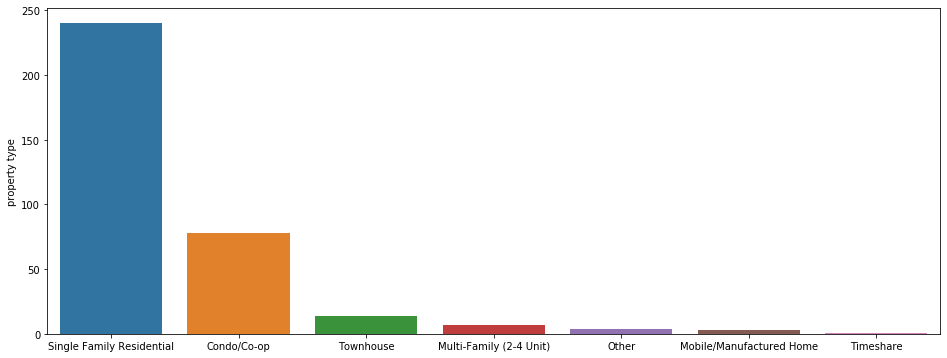

In [19]:
sns.barplot(df['property type'].value_counts().index, df['property type'].value_counts())
plt.gcf().set_size_inches(16, 6)

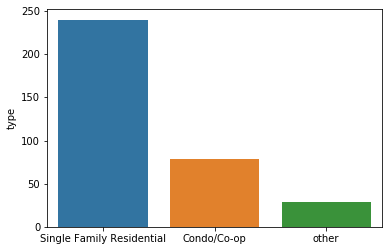

In [20]:
df['type'] = df['property type'].apply(lambda c: 
                                        c if c in ['Single Family Residential', 'Condo/Co-op']
                                          else 'other')

sns.barplot(df['type'].value_counts().index, df['type'].value_counts())
plt.show()

### 2. Simple EDA for the Dataset

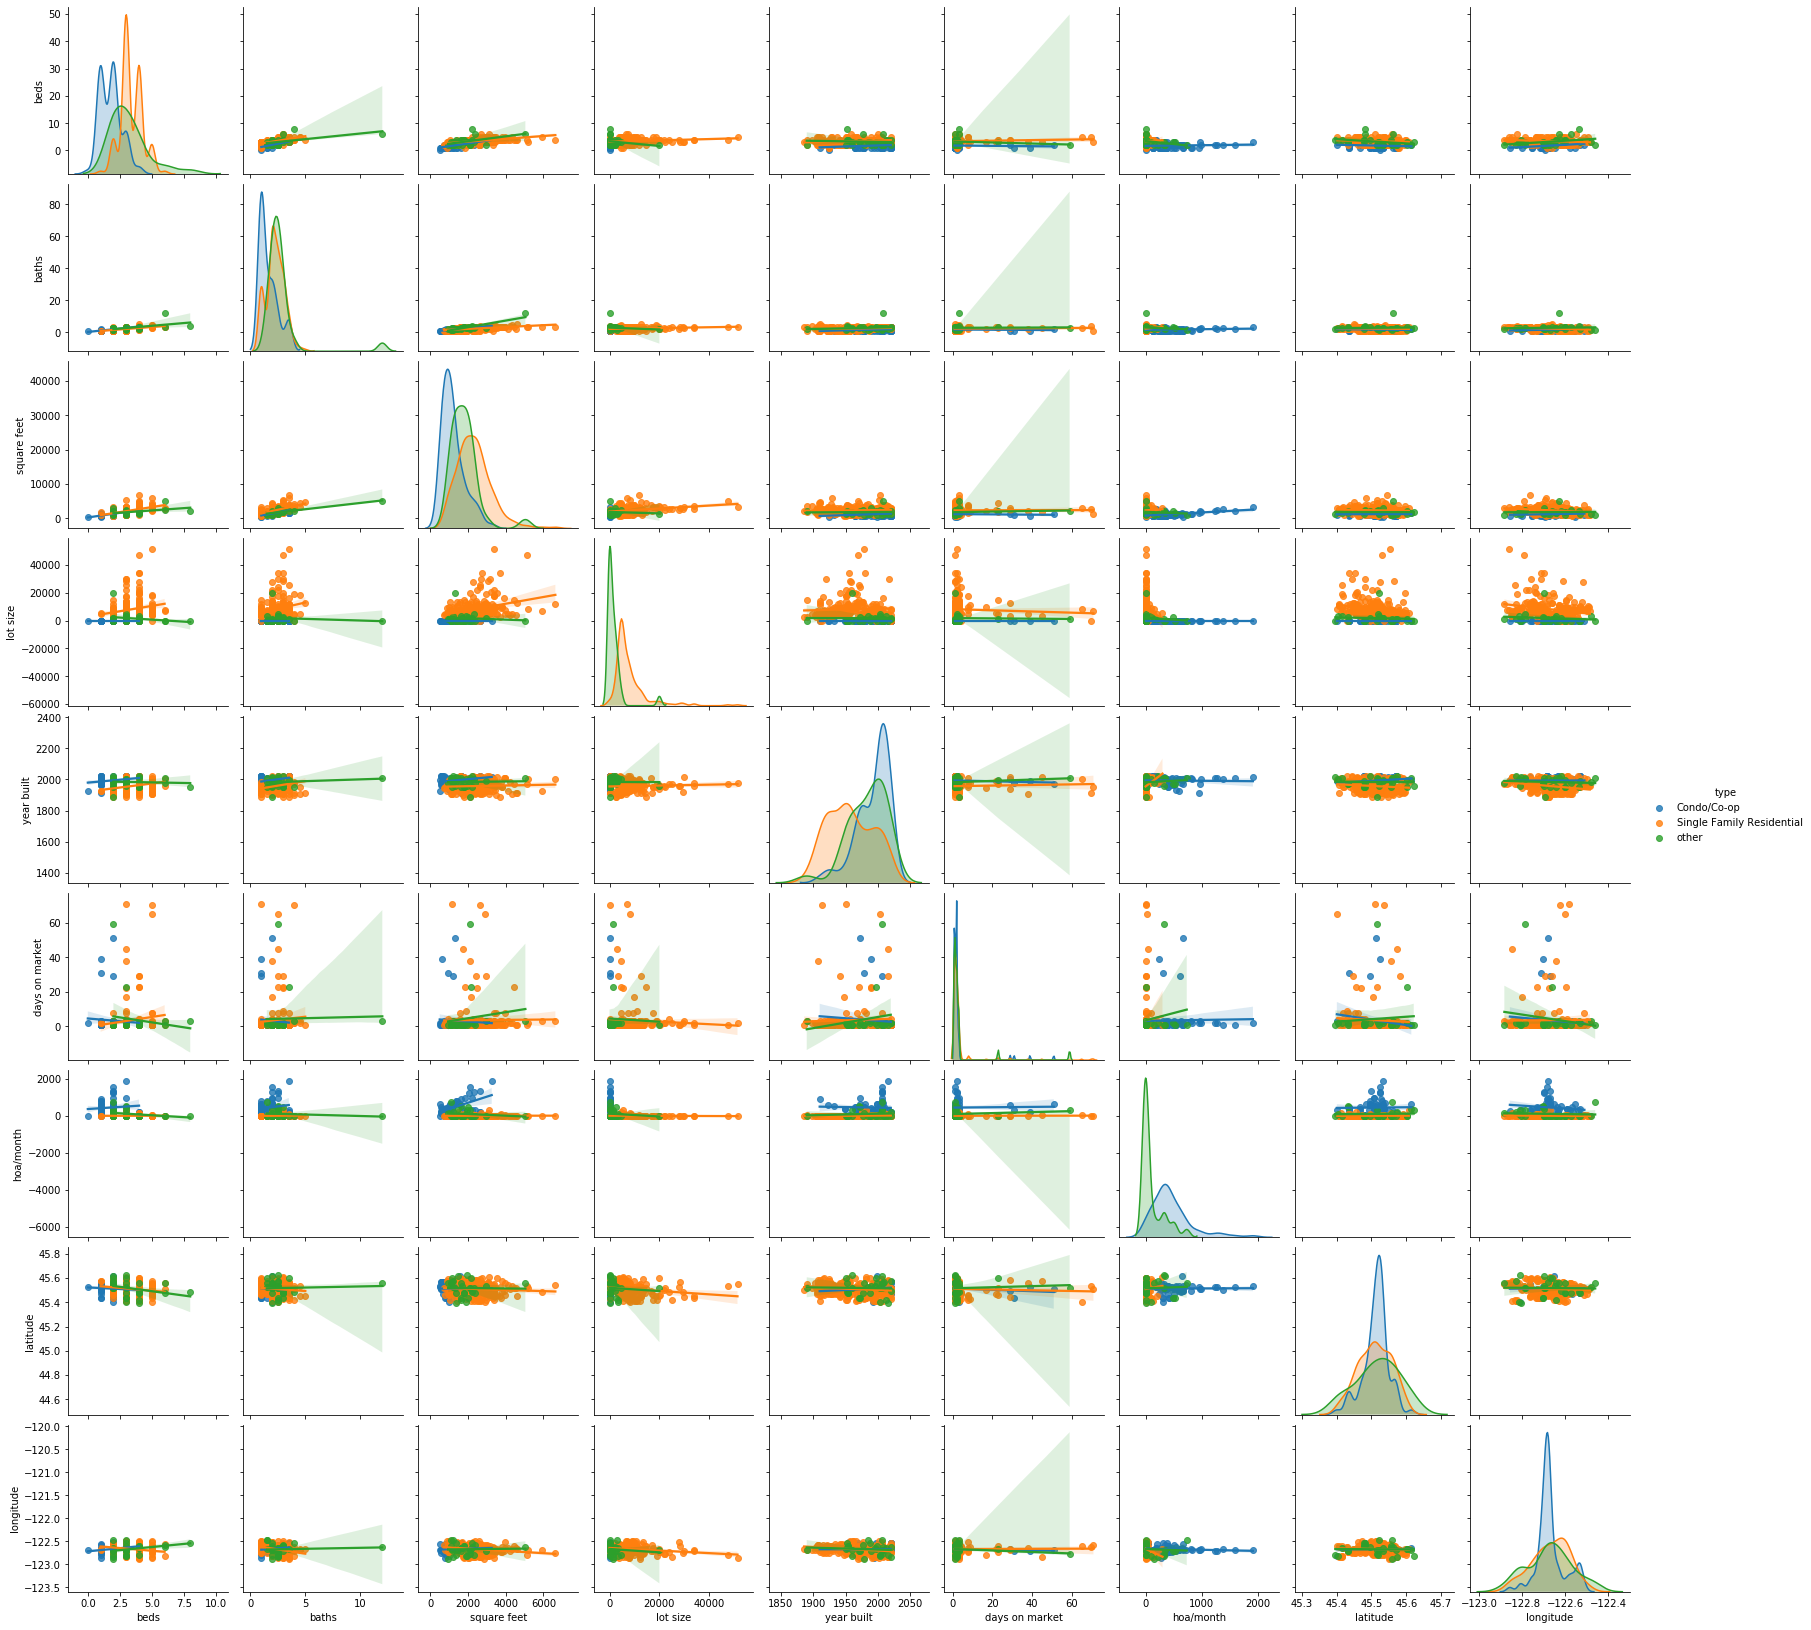

In [21]:
import warnings
warnings.filterwarnings('ignore')

features = df.columns.to_list()[2:]
X, y = df[features], df['price']

sns.pairplot(X, kind='reg', hue='type')
plt.show()

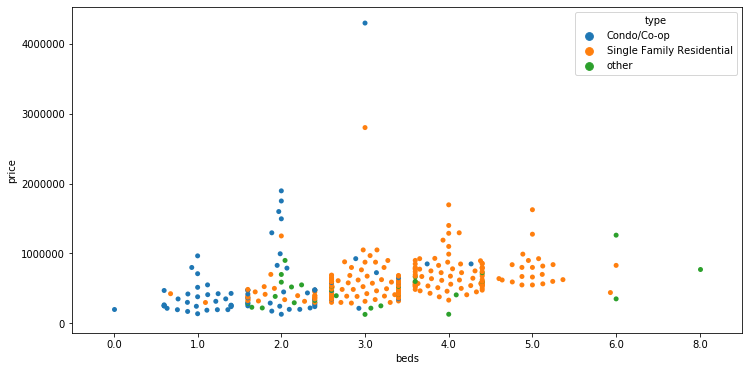

In [22]:
sns.swarmplot(data=df, x='beds', y='price', hue='type')
plt.gcf().set_size_inches(12, 6)

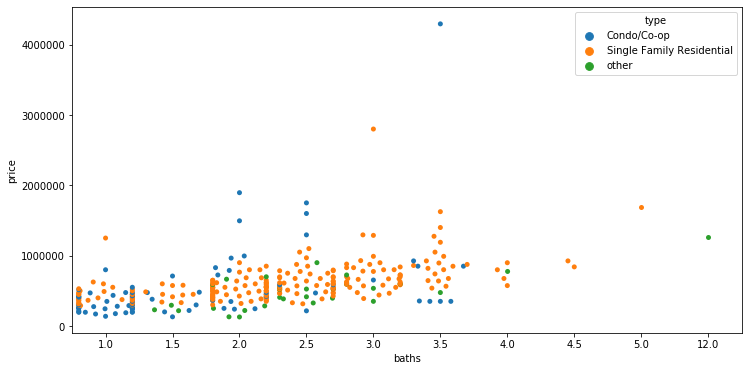

In [23]:
sns.swarmplot(data=df, x='baths', y='price', hue='type')
plt.gcf().set_size_inches(12, 6)

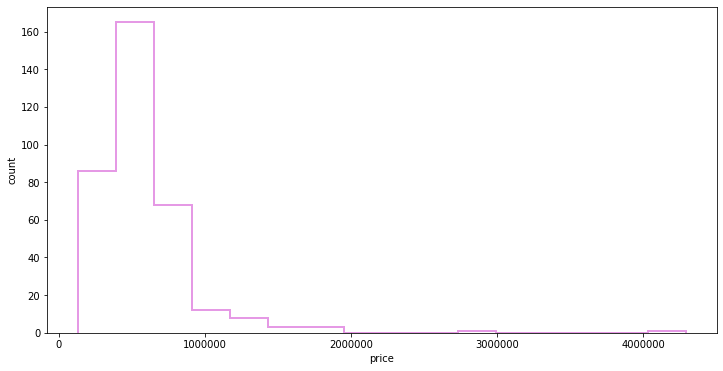

In [24]:
sns.distplot(y, bins=16, kde=False,
                      hist_kws={'histtype': 'step', 'lw': 2, 'color': 'm'})

plt.ylabel('count')
plt.gcf().set_size_inches(12, 6)

#### One-hot Encode the 'type' Column Prior to Apply the Algorithms

In [25]:
X['type'] = pd.get_dummies(X['type'])

In [26]:
from sklearn.model_selection import cross_val_score as CVS
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

n_splits = 10
models = {'LR': LinearRegression(),
          'DT': DecisionTreeRegressor()}
rmse = {}
for name, model in models.items():
    score = (-CVS(model, X, y, cv=n_splits, scoring='neg_mean_squared_error'))**.5
    rmse[name] = score
    print('The RMSE of {} = {:.0f}'.format(name, np.mean(score)))

The RMSE of LR = 221787
The RMSE of DT = 233260


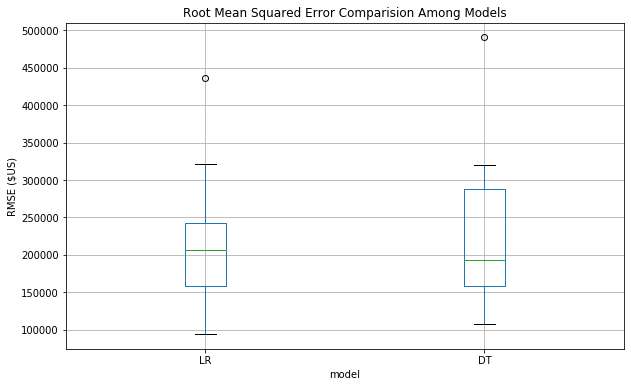

In [27]:
df_rmse = pd.DataFrame(rmse)
df_rmse.boxplot(figsize=(10, 6))
plt.xlabel('model')
plt.ylabel('RMSE ($US)')
plt.title('Root Mean Squared Error Comparision Among Models')
plt.show()